# Human Activity Recognition with Machine Learning
Human Activity Recognition (HAR) is a field that aims to identify and classify human activities based on data collected from various sensors. In this blog post, we will explore a dataset containing accelerometer and gyroscope readings from different subjects performing various activities. We will use machine learning techniques to build a model that can accurately classify these activities.

### Setting up the Environment
To begin, we import the necessary libraries, including Pandas, NumPy, Seaborn, and Matplotlib. These libraries provide powerful tools for data manipulation, analysis, and visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Overview
The dataset we will be using consists of two files: train.csv and test.csv. The train.csv file contains the training data, while the test.csv file contains the testing data. We will load both files into pandas DataFrames and combine them for further analysis.

In [10]:
# load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# check data
train['Data'] = 'Train'
test['Data'] = 'Test'
# merge data
both = pd.concat([train, test], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)
# shape of data
print(train.shape, test.shape)
# some rows of data
both.head()

(7352, 564) (2947, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,STANDING,Train


### Exploring the Data
We start by examining the structure of the combined dataset. By calling both.head(), we can preview the first few rows and get an initial understanding of the data. To gain more insights, we check the data types of each column using both.dtypes.value_counts(), which provides a count of each data type present.

In [3]:
# data types
both.dtypes.value_counts()

float64    561
object       3
dtype: int64

The dataset contains several columns, including the subject ID, activity label, and sensor readings. To get a better understanding of the dataset, let's examine some basic details:

In [4]:
# missing values
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,object
Activity,0,6,object


This function provides us with information about missing values, the number of unique values in each column, and the data types of the columns.

### Data Visualization
Before diving into model building, let's visualize the distribution of activity labels in the dataset.

<BarContainer object of 6 artists>

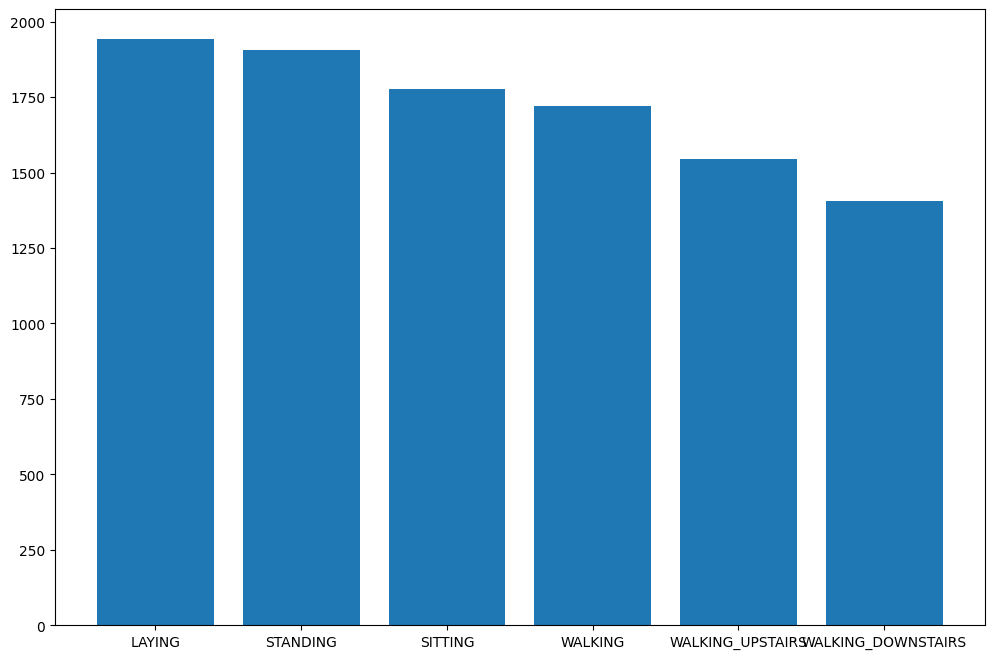

In [5]:
# visualize 
activity = both['Activity']
label_counts = activity.value_counts()

plt.figure(figsize= (12, 8))
plt.bar(label_counts.index, label_counts)

This bar plot gives us an overview of the different activities present in the dataset and their respective frequencies.

### Data Preprocessing
To prepare the data for machine learning models, we need to perform some preprocessing steps. Firstly, we separate the features from the target variable and drop unnecessary columns like 'Data,' 'subject,' and 'Activity.'

In [6]:
Data = both['Data']
Subject = both['subject']
train = both.copy()
train = train.drop(['Data','subject','Activity'], axis =1)

Next, we apply feature scaling using the StandardScaler to standardize the feature values.
Since the dataset may have high dimensionality, we can perform dimensionality reduction using Principal Component Analysis (PCA) to retain 90% of the explained variance.

In [7]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(train)

# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=0)
train = pca.fit_transform(train)

## Model Building and Evaluation
We will split the preprocessed data into training and testing sets using the train_test_split function from scikit-learn. We will allocate 80% of the data for training and 20% for testing.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, activity, test_size = 0.2, random_state = 0)

Some 

Next, we will use the K-nearest neighbors (KNN) algorithm for classification. We initialize a KNeighborsClassifier model and evaluate its performance using cross-validation and accuracy metrics. Finally, we can visualize the confusion matrix to gain insights into the classification results.

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       377
           SITTING       0.93      0.87      0.89       364
          STANDING       0.89      0.94      0.91       390
           WALKING       0.96      0.99      0.97       335
WALKING_DOWNSTAIRS       0.99      0.95      0.97       278
  WALKING_UPSTAIRS       0.99      0.98      0.98       316

          accuracy                           0.95      2060
         macro avg       0.96      0.95      0.95      2060
      weighted avg       0.95      0.95      0.95      2060



<AxesSubplot: >

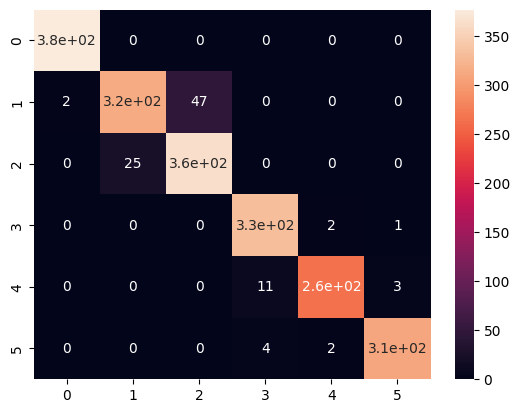

In [9]:
# Finalizing the model and comparing the test, predict results
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
model = KNeighborsClassifier()

scoring = 'accuracy'
results = {}
accuracy = {}

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

# Conclusion
In this code, we explored a Human Activity Recognition dataset and built a machine learning model using the K-nearest neighbors algorithm to classify human activities based on accelerometer and gyroscope readings. We performed data preprocessing, feature scaling, dimensionality reduction, and evaluated the model's performance using accuracy metrics and a confusion matrix.

Understanding human activity patterns has various applications, such as fitness tracking, healthcare monitoring, and smart device interactions. By leveraging machine learning techniques, we can develop robust models that can automatically recognize and classify human activities with high accuracy.